In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Read csv file and create DataFrame
df = pd.read_csv('weather.csv')
# Convert Date.Full feature to datatime type 
df['Date.Full'] = pd.to_datetime(df['Date.Full'])
# Select weather for Dallas,TX in 2016
df_dallas = df.loc[(df['Station.Location'] == 'Dallas, TX')\
                   & (df['Date.Full'].dt.year.eq(2016)),\
                   ['Data.Precipitation', 'Date.Full', 'Date.Month', 'Data.Temperature.Avg Temp']]

# Select two columns Date.Month and Data.Precipitation,
# Groupby Data.Month, calculate mean value for each month
# Reset index and round all mean values to 2 decimal points
df_dallas_per_month = df_dallas[['Date.Month', 'Data.Precipitation']]\
                        .groupby('Date.Month')\
                        .sum()\
                        .reset_index()\
                        .round(2)
df_dallas_per_month.to_csv('dallas_weather.csv')

In [132]:
df_dallas_per_month

,Date.Month,Data.Precipitation
0,1,1.53
1,2,2.01
2,3,2.68
3,4,5.09
4,5,3.86
5,6,3.36
6,7,3.98
7,8,3.53
8,9,0.45
9,10,1.56


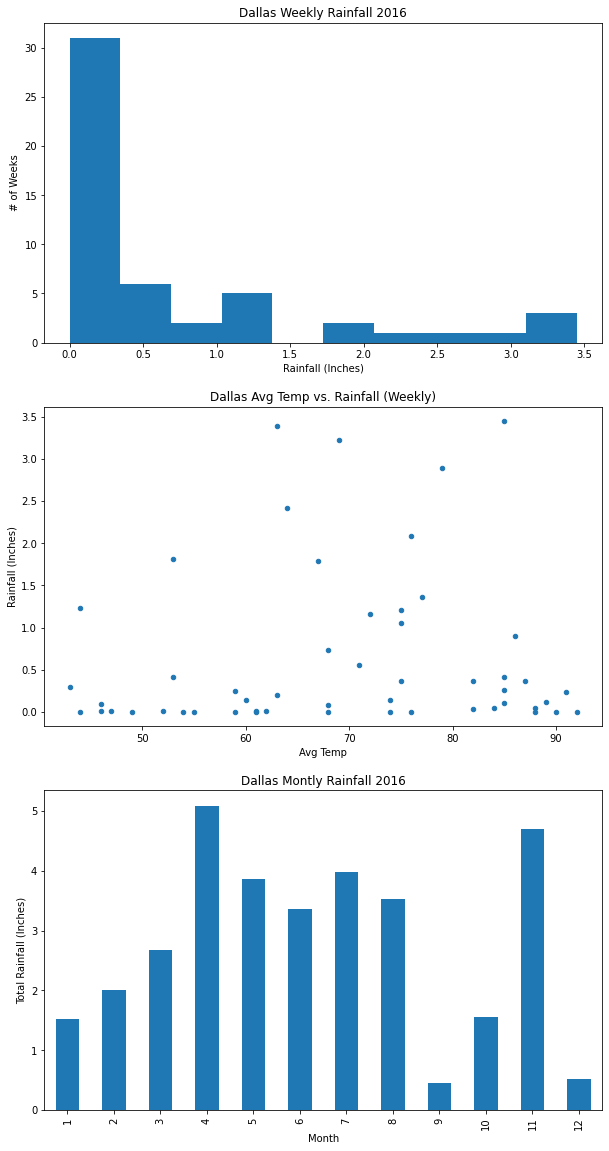

In [134]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))


df_dallas['Data.Precipitation'].plot(kind='hist',
                                     ax=ax[0],
                                     title='Dallas Weekly Rainfall 2016').set(xlabel='Rainfall (Inches)',
                                                                              ylabel='# of Weeks')

df_dallas.plot(kind='scatter',
               ax=ax[1],
               x='Data.Temperature.Avg Temp',
               y='Data.Precipitation',
               title='Dallas Avg Temp vs. Rainfall (Weekly)').set(xlabel='Avg Temp',
                                                                  ylabel='Rainfall (Inches)')
df_dallas_per_month.plot(kind='bar',
               ax=ax[2],
               x='Date.Month',
               y='Data.Precipitation',
               title='Dallas Montly Rainfall 2016',
               legend=False).set(xlabel='Month',
                                 ylabel='Total Rainfall (Inches)')
plt.savefig("dallas_weather.png")